https://github.com/nedimm/Multi-class-Classification-with-Neural-Networks

https://github.com/mansiwagh05/Multiclass-Classification-using-Neural-Network/blob/master/main.ipynb

https://towardsdatascience.com/batch-normalization-in-practice-an-example-with-keras-and-tensorflow-2-0-b1ec28bde96f

In [1]:
import pandas as pd
import math
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.optimizers import adam
%matplotlib inline
import random
import pandas, numpy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
# this wrapper makes it possible to train on subset of features
import sklearn
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
# import xgboost as xgb
from itertools import tee, islice
from ROOT import TFile, TCanvas, TPad, TPaveLabel, TPaveText, TTree, TH1F, TF1
from root_numpy import root2array, tree2array, array2tree, array2root
import sys
from ROOT import gROOT, AddressOf
from root_numpy import root2array, rec2array
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.ticker as ticker
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.datasets import make_multilabel_classification

Using TensorFlow backend.


Welcome to JupyROOT 6.16/00


In [2]:
signal = '/afs/cern.ch/user/s/sraj/public/data_folder/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
back_1 = '/afs/cern.ch/user/s/sraj/public/data_folder/signal.root'
back_2 = '/afs/cern.ch/user/s/sraj/public/data_folder/back.root'
back_3 = '/afs/cern.ch/user/s/sraj/public/data_folder/output_TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8.root'
# out_dir = '/afs/cern.ch/user/s/sraj/public/plot'
#Calling out the folder in which the data is stored
treeName_back_1 ="tagsDumper/trees/tth_125_13TeV_THQLeptonicTag" 
treeName_back_2 ="tagsDumper/trees/thq_125_13TeV_THQLeptonicTag" 
treeName_back_3 ="tagsDumper/trees/ttgg_13TeV_THQLeptonicTag" 
treeName_signal = "tagsDumper/trees/Tprime_600_13TeV_THQLeptonicTag"
columns = ['dipho_pt',
           'dipho_phi',
           'dipho_eta',
           'dipho_e',
           'dipho_mass',
           'dipho_leadPt',
           'dipho_leadEt',
           'dipho_leadEta',
           'dipho_leadPhi',
           'dipho_subleadEta',
           'bjet1_pt',
           'bjet2_pt',
           'bjet1_eta',
           'bjet2_eta',
           'jet1_pt',
           'jet2_pt',
           'jet1_eta',
           'n_jets',
           'n_bjets',
           'bjet2_phi',
           'bjet3_phi',
#            'bjet3_eta',
           'bjet1_discr',
           'bjet2_discr',
           'bjet3_discr',
           'jet3_pt',
#           'jet1_phi',
#          'jet2_phi' ,
          'jet3_phi',
          'jet1_e',
          'jet2_e',
          'jet3_e',
#            'CMS_hgg_mass',
#             'sigmaMoM_decorr',
#             'dipho_sumpt',
#             'dipho_cosphi',
# #             'dipho_mass',
#             'dipho_lead_ptoM',
#             'ele1_pt',
#             'ele2_pt',
#             'ele1_eta',
#             'ele2_eta',
#             'ele1_phi',
#             'ele2_phi',
#             'ele1_e',
#             'ele2_e',
#             'ele1_ch',
#             'ele2_ch',
          ]


#Data is converted to array
mc_arr = root2array(signal, treeName_signal, columns)
data_arr_1 = root2array(back_1, treeName_back_1, columns)
data_arr_2 = root2array(back_2, treeName_back_2, columns)
data_arr_3 = root2array(back_3, treeName_back_3, columns)

# Adding all three background all together
# data_arr= np.concatenate((data_arr_1, data_arr_2, data_arr_3),axis =0)

signal_array = rec2array(mc_arr)
backgr_array_1 = rec2array(data_arr_1)
backgr_array_2 = rec2array(data_arr_2)
backgr_array_3 = rec2array(data_arr_3)


In [3]:
signal = pd.DataFrame(signal_array)
backgr_1 = pd.DataFrame(backgr_array_1)
backgr_2 = pd.DataFrame(backgr_array_2)
backgr_3 = pd.DataFrame(backgr_array_3)

In [4]:
# adding new columns to the dataframe
#signal
signal['y0'] = signal.apply(lambda row: (1 *1),axis=1)
signal['y1'] = signal.apply(lambda row: (1 *0),axis=1)
signal['y2'] = signal.apply(lambda row: (1 *0),axis=1)
signal['y3'] = signal.apply(lambda row: (1 *0),axis=1)
#background_1
backgr_1['y0'] = backgr_1.apply(lambda row: (1 *0),axis=1)
backgr_1['y1'] = backgr_1.apply(lambda row: (1 *-1),axis=1)
backgr_1['y2'] = backgr_1.apply(lambda row: (1 *0),axis=1)
backgr_1['y3'] = backgr_1.apply(lambda row: (1 *0),axis=1)
#background_2
backgr_2['y0'] = backgr_2.apply(lambda row: (1 *0),axis=1)
backgr_2['y1'] = backgr_2.apply(lambda row: (1 *0),axis=1)
backgr_2['y2'] = backgr_2.apply(lambda row: (1 *-2),axis=1)
backgr_2['y3'] = backgr_2.apply(lambda row: (1 *0),axis=1)
#background_3
backgr_3['y0'] = backgr_3.apply(lambda row: (1 *0),axis=1)
backgr_3['y1'] = backgr_3.apply(lambda row: (1 *0),axis=1)
backgr_3['y2'] = backgr_3.apply(lambda row: (1 *0),axis=1)
backgr_3['y3'] = backgr_3.apply(lambda row: (1 *-3),axis=1)

In [5]:
backgr_3

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,y0,y1,y2,y3
0,52.527027,-1.174143,-1.492155,172.138580,120.741455,87.515839,87.515839,-0.567891,-1.419583,-1.200117,...,-999.000000,27.716854,-1.253697,153.137192,52.212936,31.179977,0,0,0,-3
1,123.904205,-1.136592,-0.524487,194.665710,133.856461,116.893532,116.893532,-0.433724,-0.595346,-0.240284,...,0.435022,141.182739,1.768778,477.698456,321.817871,479.814301,0,0,0,-3
2,33.838303,-2.227046,-1.026729,131.513138,120.229546,72.416328,72.416328,-0.231969,-1.515335,-0.452563,...,-999.000000,26.691938,-0.865705,336.066193,164.827438,28.017111,0,0,0,-3
3,56.823273,2.094174,1.551175,196.795441,138.263870,71.284325,71.284325,0.123813,1.540333,1.868356,...,0.363479,127.808762,-1.104922,379.043549,288.934418,586.748901,0,0,0,-3
4,42.491947,2.864337,0.802026,179.874115,170.635025,93.304108,93.304108,-0.001781,1.891259,0.471199,...,0.721255,34.057114,-0.721865,65.048302,212.025818,456.401398,0,0,0,-3
5,116.835777,-0.621146,-1.260950,250.057312,113.728561,101.752045,101.752045,-1.307237,-1.020026,-0.328806,...,-999.000000,66.854614,-1.086610,177.747986,214.582214,97.496048,0,0,0,-3
6,226.764374,-0.013697,1.102901,398.705505,123.054565,134.217987,134.217987,1.076951,-0.482319,0.920100,...,-999.000000,-999.000000,-999.000000,218.917480,340.770935,-999.000000,0,0,0,-3
7,52.887791,-2.619108,-1.885440,211.404327,113.646957,72.985458,72.985458,-1.004061,2.884626,-1.268506,...,-999.000000,68.363838,-2.944732,404.873535,308.521179,300.426605,0,0,0,-3
8,96.213882,2.246944,-2.092790,424.964355,154.303879,124.702370,124.702370,-1.663030,1.857792,-1.085990,...,-999.000000,32.149178,-2.901817,191.870819,90.147247,85.081284,0,0,0,-3
9,71.113876,-2.741386,-2.297101,376.167175,117.940086,75.740280,75.740280,-1.864173,2.725389,-1.402611,...,-999.000000,33.242798,0.055510,617.565186,53.695919,288.875977,0,0,0,-3


In [6]:
signal.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,y0,y1,y2,y3
0,223.705856,-1.323450,0.318467,267.080170,126.641273,199.472260,199.472260,0.084015,-1.190372,1.195149,...,-999.0,32.669273,1.569978,95.607208,1191.367432,241.569809,1,0,0,0
1,260.774780,-0.267662,-0.128844,290.720459,124.014992,217.392303,217.392303,-0.121357,-0.029141,-0.101361,...,-999.0,-999.000000,-999.000000,118.092453,414.571472,-999.000000,1,0,0,0
2,161.275345,1.180603,1.236659,325.605042,123.836288,121.089691,121.089691,0.842742,0.717829,1.373165,...,-999.0,38.143219,-0.088661,1073.277710,710.365112,1559.091675,1,0,0,0
3,180.834686,2.346533,0.262894,223.509109,122.239555,158.326920,158.326920,0.202652,2.675919,0.260665,...,-999.0,-999.000000,-999.000000,147.974121,743.884460,-999.000000,1,0,0,0
4,120.654503,1.938972,0.362926,178.034470,123.026970,139.716736,139.716736,0.194240,1.749266,0.534833,...,-999.0,27.921988,-0.433156,181.441132,170.393524,157.808121,1,0,0,0


In [7]:
print('Here the Signal(Tprime) shape is',signal.shape)
print('Here the background(tth) shape is',backgr_1.shape)
print('Here the background(thq) shape is',backgr_2.shape)
print('Here the background(ttgg) shape is',backgr_3.shape)


Here the Signal(Tprime) shape is (81013, 33)
Here the background(tth) shape is (92486, 33)
Here the background(thq) shape is (338874, 33)
Here the background(ttgg) shape is (55847, 33)


In [8]:
Z = pd.concat((signal, backgr_1, backgr_2, backgr_3),axis=0)
Z

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,y0,y1,y2,y3
0,223.705856,-1.323450,0.318467,267.080170,126.641273,199.472260,199.472260,0.084015,-1.190372,1.195149,...,-999.000000,32.669273,1.569978,95.607208,1191.367432,241.569809,1,0,0,0
1,260.774780,-0.267662,-0.128844,290.720459,124.014992,217.392303,217.392303,-0.121357,-0.029141,-0.101361,...,-999.000000,-999.000000,-999.000000,118.092453,414.571472,-999.000000,1,0,0,0
2,161.275345,1.180603,1.236659,325.605042,123.836288,121.089691,121.089691,0.842742,0.717829,1.373165,...,-999.000000,38.143219,-0.088661,1073.277710,710.365112,1559.091675,1,0,0,0
3,180.834686,2.346533,0.262894,223.509109,122.239555,158.326920,158.326920,0.202652,2.675919,0.260665,...,-999.000000,-999.000000,-999.000000,147.974121,743.884460,-999.000000,1,0,0,0
4,120.654503,1.938972,0.362926,178.034470,123.026970,139.716736,139.716736,0.194240,1.749266,0.534833,...,-999.000000,27.921988,-0.433156,181.441132,170.393524,157.808121,1,0,0,0
5,185.808853,0.757531,-0.124497,226.532318,127.491455,160.493835,160.493835,-0.251128,1.063309,0.296080,...,-999.000000,-999.000000,-999.000000,2675.509033,186.380829,-999.000000,1,0,0,0
6,228.663040,0.447304,0.370839,274.364807,124.350227,153.503937,153.503937,0.704065,0.424366,-0.394507,...,-999.000000,32.364857,-2.867919,115.572311,44.378559,51.491726,1,0,0,0
7,282.372375,-1.740866,-0.458947,336.241028,123.759834,194.530075,194.530075,-0.639045,-1.531173,-0.012349,...,-999.000000,33.911591,2.916442,160.574402,620.130371,632.380615,1,0,0,0
8,151.547104,-2.247694,-1.792089,483.525085,123.768913,147.060074,147.060074,-1.662575,-1.946716,-1.206012,...,-999.000000,94.417572,0.832121,414.819031,118.675797,170.248520,1,0,0,0
9,294.236725,1.035946,0.471853,351.244080,126.680428,216.993225,216.993225,0.395068,0.766695,0.521493,...,-999.000000,77.136948,-2.981579,433.923035,217.450745,89.064240,1,0,0,0


In [9]:
X = Z.iloc[:,0:29]
Y = Z.iloc[:,29:33]
# Y

In [10]:
X_train,X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.33, random_state =400)

In [11]:
print(X_train.shape)
print(X_test.shape)

(380707, 29)
(187513, 29)


In [12]:
print(Y_train.shape)
print(Y_test.shape)

(380707, 4)
(187513, 4)


In [13]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils.vis_utils import plot_model
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adadelta
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import RandomNormal, Constant


In [14]:
# clf = Sequential()
# # clf.add(LSTM(1, return_sequences=True ))
# # clf.add(BatchNormalization())
# clf.add(Dropout(3,input_shape = (29,)))
# clf.add(Dense(200, activation = 'relu', kernel_initializer = 'lecun_uniform',name = 'dense_1'))
# clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform', name = 'dense_2'))
# clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform', name = 'dense_3'))
# clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform',name = 'dense_4'))
# clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform', name = 'dense_5'))
# #Output
# clf.add(Dense(4, activation = 'softmax', kernel_initializer = 'lecun_uniform', name = 'output'))
# #compile model
# clf.compile(loss = 'categorical_crossentropy', 
#             optimizer='Adadelta',
#             metrics=['accuracy'])
# print('Summary of the built model...')
# print(clf.summary())
# plot_model(clf, to_file='clf_plot____.png', show_shapes=True, show_layer_names=True)

In [110]:
clf = Sequential()
# clf.add(LSTM(1, return_sequences=True ))
clf.add(BatchNormalization(input_shape = (29,)))
clf.add(Dropout(3))
clf.add(Dense(200, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform',name = 'dense_1'))
clf.add(BatchNormalization())
clf.add(Dropout(0.4))
clf.add(Dense(100, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_2'))
clf.add(Dropout(0.4))
clf.add(Dense(100, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_3'))
clf.add(BatchNormalization())
clf.add(Dense(50, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform',name = 'dense_4'))
clf.add(BatchNormalization())
clf.add(Dense(50, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_5'))
clf.add(BatchNormalization(momentum=0.95,epsilon=0.005,beta_initializer=RandomNormal(mean=0.0, stddev=0.05),gamma_initializer=Constant(value=0.9)))

# Output
clf.add(Dense(4, activation = 'softmax',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'output'))
#compile model

opt = SGD(lr=0.01, momentum=0.9)
clf.compile(loss = 'categorical_crossentropy', 
            optimizer= 'adam',
            metrics=['accuracy'])
print('Summary of the built model...')
print(clf.summary())
plot_model(clf, to_file='/eos/home-s/sraj/M.Sc._Thesis/Plot/''clf_plot_multiclass___.png', show_shapes=True, show_layer_names=True)

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 29)                116       
_________________________________________________________________
dropout_4 (Dropout)          (None, 29)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6000      
_________________________________________________________________
batch_normalization_7 (Batch (None, 200)               800       
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)      

In [16]:
from keras.utils import to_categorical
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [17]:
# simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
# h = clf.fit(X_train,Y_train, epochs = 10, batch_size= 900, shuffle=True,validation_split = 0.25,verbose =0, callbacks=[es])
h = clf.fit(X_train,Y_train, epochs = 100, batch_size= 9000, shuffle=True,validation_split = 0.25)

Train on 285530 samples, validate on 95177 samples
Epoch 1/100
285530/285530 [==============================] - 5s 18us/step - loss: -5.1571 - acc: 0.2065 - val_loss: -14.6449 - val_acc: 0.2452
Epoch 2/100
285530/285530 [==============================] - 3s 11us/step - loss: -12.2756 - acc: 0.2365 - val_loss: -19.3864 - val_acc: 0.2730
Epoch 3/100
285530/285530 [==============================] - 3s 10us/step - loss: -18.0796 - acc: 0.3415 - val_loss: -22.0147 - val_acc: 0.5458
Epoch 4/100
285530/285530 [==============================] - 3s 10us/step - loss: -21.5046 - acc: 0.4708 - val_loss: -23.7100 - val_acc: 0.6593
Epoch 5/100
285530/285530 [==============================] - 3s 10us/step - loss: -23.1062 - acc: 0.5419 - val_loss: -24.3358 - val_acc: 0.7214
Epoch 6/100
285530/285530 [==============================] - 3s 11us/step - loss: -23.8471 - acc: 0.6091 - val_loss: -24.7259 - val_acc: 0.7661
Epoch 7/100
285530/285530 [==============================] - 3s 10us/step - loss: -24.

285530/285530 [==============================] - 3s 11us/step - loss: -26.4452 - acc: 0.9639 - val_loss: -26.4683 - val_acc: 0.9675
Epoch 58/100
285530/285530 [==============================] - 3s 11us/step - loss: -26.4474 - acc: 0.9651 - val_loss: -26.4787 - val_acc: 0.9681
Epoch 59/100
285530/285530 [==============================] - 3s 12us/step - loss: -26.4510 - acc: 0.9644 - val_loss: -26.4819 - val_acc: 0.9671
Epoch 60/100
285530/285530 [==============================] - 3s 11us/step - loss: -26.4540 - acc: 0.9637 - val_loss: -26.2717 - val_acc: 0.9665
Epoch 61/100
285530/285530 [==============================] - 3s 11us/step - loss: -26.4583 - acc: 0.9660 - val_loss: -26.1264 - val_acc: 0.9707
Epoch 62/100
285530/285530 [==============================] - 3s 11us/step - loss: -26.4616 - acc: 0.9670 - val_loss: -26.2515 - val_acc: 0.9703
Epoch 63/100
285530/285530 [==============================] - 3s 11us/step - loss: -26.4643 - acc: 0.9683 - val_loss: -26.3759 - val_acc: 0.970

2021-11-19 06:43:20.808010: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


In [18]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.58%


In [30]:
# Final evaluation of the model for DNN
scores = clf.evaluate(X_train, Y_train, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.57%


In [26]:
h.history

{'val_loss': [-14.644877261803455,
  -19.386431254523146,
  -22.014739005868773,
  -23.710007500477907,
  -24.33577010474172,
  -24.725870301984827,
  -25.14620106462003,
  -25.4358431183047,
  -25.594348359476456,
  -25.737873264826852,
  -25.848899363895285,
  -25.94643801940019,
  -25.98926385536652,
  -26.057815743861408,
  -26.09550587055829,
  -26.11776362976772,
  -26.155115629225204,
  -26.181415945254884,
  -26.195918848909923,
  -26.19307865405066,
  -26.248990736762497,
  -26.264587495690147,
  -26.27039451360244,
  -26.258017083436396,
  -26.290907995062337,
  -26.309717874955734,
  -26.173571518062012,
  -26.305105186304566,
  -26.32967050764131,
  -26.33924490473351,
  -26.33368131376111,
  -26.330091567782823,
  -26.361417567640895,
  -26.367616682159728,
  -26.36973967605742,
  -26.381498389877997,
  -26.389486233026787,
  -26.39503653125596,
  -26.352659981734003,
  -26.40279863247865,
  -26.40884252244191,
  -26.415717174868664,
  -26.409320934785473,
  -25.2667512563

We can identify overfitting by looking at validation metrics, like loss or accuracy. Usually, the validation metric stops improving after a certain number of epochs and begins to decrease afterward. The training metric continues to improve because the model seeks to find the best fit for the training data.

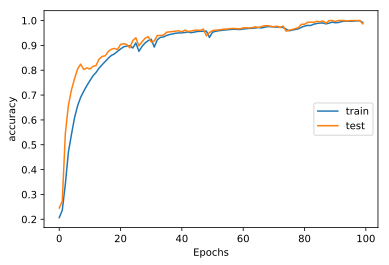

In [38]:
plt.plot(h.history['acc'], label='train')
plt.plot(h.history['val_acc'], label='test')
plt.legend(loc='center right')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot/'"Model_accuracy_multiclass.png")
plt.show()

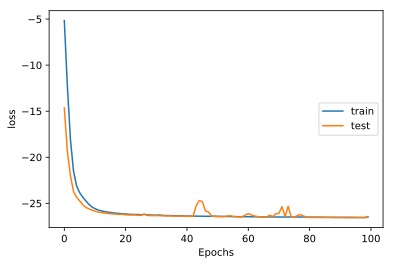

In [41]:
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend(loc='center right')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot/'"Model_loss_multiclass.png")
plt.show()

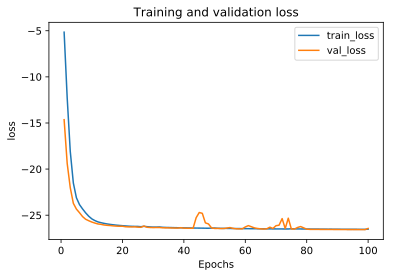

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = h.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
plot_metric(h, 'loss')

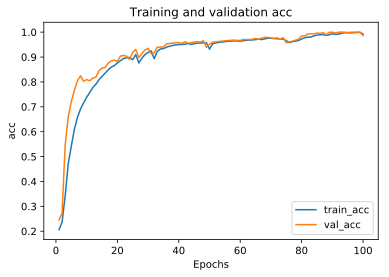

In [24]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
plot_metric(h, 'acc')

In [70]:
Y_test


,y0,y1,y2,y3
86872,0,0,-2,0
165974,0,0,-2,0
68706,1,0,0,0
197217,0,0,-2,0
140148,0,0,-2,0
320288,0,0,-2,0
70483,1,0,0,0
118958,0,0,-2,0
161413,0,0,-2,0
116549,0,0,-2,0


In [76]:
# from sklearn.metrics import roc_curve, auc

# decisions = clf.predict_proba(X_test)

# # Compute ROC curve and area under the curve
# fpr, tpr, thresholds = roc_curve(Y_test["-2"], decisions)
# roc_auc = auc(fpr, tpr)
# plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

# plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.grid()
# # plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot/'"ROC_curve_TPrime_ttgg.png")
# plt.show()

In [83]:
y_score = clf.predict_proba(X_test)
y_score

array([[1.0000000e+00, 4.8316473e-08, 6.1951098e-09, 1.7920982e-08],
       [1.0000000e+00, 5.6155091e-08, 8.4036582e-09, 2.1352806e-08],
       [9.9999988e-01, 6.0852614e-08, 9.6913677e-09, 3.2614704e-08],
       ...,
       [9.9999988e-01, 6.0986238e-08, 1.0247767e-08, 3.1110545e-08],
       [1.0000000e+00, 6.5297878e-09, 7.2252315e-11, 1.7506736e-09],
       [1.0000000e+00, 1.9693229e-09, 1.9561807e-11, 5.3257936e-11]],
      dtype=float32)

In [101]:
Y.info

<bound method DataFrame.info of        y0  y1  y2  y3
0       1   0   0   0
1       1   0   0   0
2       1   0   0   0
3       1   0   0   0
4       1   0   0   0
5       1   0   0   0
6       1   0   0   0
7       1   0   0   0
8       1   0   0   0
9       1   0   0   0
10      1   0   0   0
11      1   0   0   0
12      1   0   0   0
13      1   0   0   0
14      1   0   0   0
15      1   0   0   0
16      1   0   0   0
17      1   0   0   0
18      1   0   0   0
19      1   0   0   0
20      1   0   0   0
21      1   0   0   0
22      1   0   0   0
23      1   0   0   0
24      1   0   0   0
25      1   0   0   0
26      1   0   0   0
27      1   0   0   0
28      1   0   0   0
29      1   0   0   0
...    ..  ..  ..  ..
55817   0   0   0  -3
55818   0   0   0  -3
55819   0   0   0  -3
55820   0   0   0  -3
55821   0   0   0  -3
55822   0   0   0  -3
55823   0   0   0  -3
55824   0   0   0  -3
55825   0   0   0  -3
55826   0   0   0  -3
55827   0   0   0  -3
55828   0   0   0  -3


In [107]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

y_prob_pred_cnb = clf.predict_proba(X_test)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300);    

ValueError: multiclass-multioutput format is not supported

In [108]:
y = preprocessing.label_binarize(Y, classes=[0, -1, -2, -3])

ValueError: Multioutput target data is not supported with label binarization

In [109]:
lb = LabelBinarizer()

if labels is not None:
    lb.fit(labels)
else:
    lb.fit(y_true)

NameError: name 'LabelBinarizer' is not defined

In [77]:
# def plot_multiclass_roc(clf, X_test, Y_test, n_classes, figsize=(17, 6)):
#     y_score = clf.decision_function(X_test)

#     # structures
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()

#     # calculate dummies once
#     Y_test_dummies = pd.get_dummies(Y_test, drop_first=False).values
#     for i in range(n_classes):
#         fpr[i], tpr[i], _ = roc_curve(Y_test_dummies[:, i], y_score[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     # roc for each class
#     fig, ax = plt.subplots(figsize=figsize)
#     ax.plot([0, 1], [0, 1], 'k--')
#     ax.set_xlim([0.0, 1.0])
#     ax.set_ylim([0.0, 1.05])
#     ax.set_xlabel('False Positive Rate')
#     ax.set_ylabel('True Positive Rate')
#     ax.set_title('Receiver operating characteristic example')
#     for i in range(n_classes):
#         ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
#     ax.legend(loc="best")
#     ax.grid(alpha=.4)
#     sns.despine()
#     plt.show()
# plot_multiclass_roc(X_test, Y_test, n_classes=4, figsize=(16, 10))


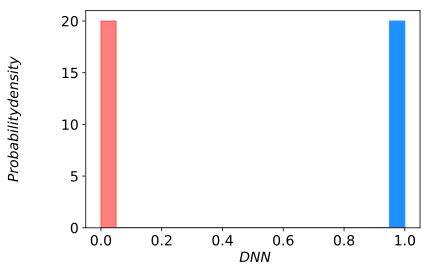

In [75]:
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict_proba(X_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[Y_test==-3]
tSig = tTest[Y_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=True, color ='dodgerblue' )
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=True,color = 'red' ,alpha=0.5)
# plt.savefig('output_TPrime_ttgg.png')
plt.show()